## Group: Jingmin Chen, Tianyu Sun

# Introduction

There is a dataset for classification. Labels in this dataset are specified as 0 and 1. This dataset contains some data attributes and prediction results of a classification model.

-   `class`: The actual class label of a data entry

-   `scored.class`: prediction result of the classification model

-   `scored.probability`: the likelihood of a data entry belong to '1'

I'll analysis these prediction result using different metrics in following parts.

In [4]:
# import python libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc

## Load data

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/TTZUO/DAV-6150/master/M5_Data.csv')
data.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


## Confusion matrix

In this part I'll use crosstab to calculate confusion matrix and compare the result with value_counts. And then save some import values(True Positive, False Positive, True Negative, False Positive) for further use.

The confusion matrix is calculated by true label and predict label. And values in confusion matrix are based on number of each value.
So I printed confusion matrix and value counts to see if summary of confusion matrix's row is value counts.

In [55]:
# calculate confusion matrix
conf_mat = pd.crosstab(data['class'], data['scored.class'])

print('confusion matrix: ')
print(conf_mat)
print()

# see value counts of each value
# the summary of rows and columns in confusion matrix may equal to value counts
print('value_counts on class')
print(data['class'].value_counts())
print()

print('value_counts on scored.class')
print(data['scored.class'].value_counts())

true_pos_count = conf_mat[1][1]
false_pos_count = conf_mat[1][0]
true_neg_count = conf_mat[0][0]
false_neg_count = conf_mat[0][1]
print('true_pos_count: ',true_pos_count)
print('false_pos_count: ',false_pos_count)
print('true_neg_count: ',true_neg_count)
print('false_neg_count: ',false_neg_count)

confusion matrix: 
scored.class    0   1
class                
0             119   5
1              30  27

value_counts on class
0    124
1     57
Name: class, dtype: int64

value_counts on scored.class
0    149
1     32
Name: scored.class, dtype: int64
true_pos_count:  27
false_pos_count:  5
true_neg_count:  119
false_neg_count:  30


## Some metric functions

### accuracy

In [21]:
def accuracy(actual_label, pred_label):

    # handle wrong input
    if len(actual_label) != len(pred_label):
        raise ValueError("input shape not align!")
    else:
        # calculate number of correct classified entry and the ratio
        return (actual_label == pred_label).sum() / actual_label.shape[0]


### precision

In [22]:
def precision(actual_label, pred_label):

    # calculate tp and fp
    tp = (pred_label == 1)[actual_label == 1].sum()
    fp = (pred_label == 1)[actual_label != 1].sum()

    # return precision
    return tp / (tp + fp)

### sensitive

In [23]:
def sensitive(actual_label, pred_label):

    # calculate tp and fn
    tp = (pred_label == 1)[actual_label == 1].sum()
    fn = (pred_label == 0)[actual_label != 0].sum()

    # return sensitive
    return tp / (tp + fn)

### specificity

In [24]:
def specificity(actual_label, pred_label):
    
    # calculate tn and fp
    tn = (pred_label == 0)[actual_label == 0].sum()
    fp = (pred_label == 1)[actual_label != 1].sum()

    # return specificity
    return tn / (tn + fp)

### f1 score

In [25]:
def f1(actual_label, pred_label):

    # calculate precision and recall using function defined above
    p = precision(actual_label, pred_label)
    r = sensitive(actual_label, pred_label)

    # return f1 score
    return 2 * p * r / (p + r)

### ROC and AUC

In [26]:
def roc_auc(actual_label, pred_label, proba, g=0.05):
    
    # sorted index
    index = np.argsort(-proba, kind='mergesort')

    # sorted probability
    y_score = proba[index].values
    # sorted true labels
    y_true = actual_label[index].values

    # record result
    tpr_list = []
    fpr_list = []
    auc = 0
    for i in range(y_score.shape[0]):

        # calculate tp, fn, tn and fp
        # assign 1 to [0, i] entries,
        # assign 0 to [i, len] entries
        tp = (y_true[:i] == 1).sum()
        fn = (y_true[i:] == 1).sum()

        tn = (y_true[i:] == 0).sum()
        fp = (y_true[:i] == 0).sum()

        # calculate tpr and fpr
        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)

        # record result
        tpr_list.append(tpr)
        fpr_list.append(fpr)

        # calculate auc
        # add area of each small rectangle to auc 
        if i > 0:
            auc += (fpr_list[i] - fpr_list[i - 1]) * tpr_list[i] 

    # show the figure
    plt.plot(fpr_list, tpr_list, '-')
    plt.title('ROC, AUC={:.5f}'.format(auc))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

    return auc

## Apply metrics to data

Accuracy = 0.8066298342541437
Precison = 0.84375
Sensitive = 0.47368421052631576
Specificity = 0.9596774193548387
F1 score = 0.6067415730337079


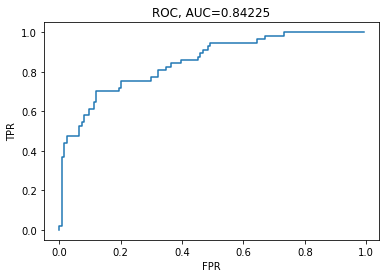

AUC = 0.842246745897001


In [15]:
print('Accuracy = {}'.format(accuracy(data['class'], data['scored.class'])))
print('Precison = {}'.format(precision(data['class'], data['scored.class'])))
print('Sensitive = {}'.format(sensitive(data['class'], data['scored.class'])))
print('Specificity = {}'.format(specificity(data['class'], data['scored.class'])))
print('F1 score = {}'.format(f1(data['class'], data['scored.class'])))

print('AUC = {}'.format(roc_auc(data['class'], data['scored.class'], data['scored.probability'])))

## Compare to sklearn

Using pre-built functions in sklearn to calculate these matrics and compare result with my function.

Accuracy = 0.8066298342541437
Precison = 0.84375
Sensitive = 0.47368421052631576
F1 score = 0.6067415730337079
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

   micro avg       0.81      0.81      0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



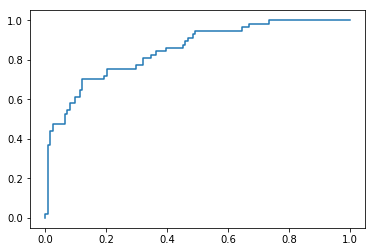

AUC=0.85031


In [16]:
print('Accuracy = {}'.format(accuracy_score(data['class'], data['scored.class'])))
print('Precison = {}'.format(precision_score(data['class'], data['scored.class'])))
# sensitive is also called recall 
print('Sensitive = {}'.format(recall_score(data['class'], data['scored.class'])))

print('F1 score = {}'.format(f1_score(data['class'], data['scored.class'])))

print(classification_report(data['class'], data['scored.class']))

fpr, tpr, th = roc_curve(data['class'], data['scored.probability'])
plt.plot(fpr, tpr)
plt.show()

print('AUC={:.5F}'.format(auc(fpr, tpr)))



## Conclusion

The result of my function is very close to result of `sklearn`